<a href="https://colab.research.google.com/github/woodword-0/ML-Algorithms/blob/main/LogisticReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# data wrangling
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from pathlib import Path
from scipy import ndimage
from scipy import stats

# dataviz
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
df.shape

(768, 9)

Normalizing and Scaling


In [ ]:
df['Pregnancies'] = np.log1p(df['Pregnancies'])
df['Glucose'] = np.log1p(df['Glucose'])
df['BloodPressure'] = np.log1p(df['BloodPressure'])
df['SkinThickness'] = np.log1p(df['SkinThickness'])
df['Insulin'] = np.log1p(df['Insulin'])
df['DiabetesPedigreeFunction'] = np.log(df['DiabetesPedigreeFunction'])
df['Age'] = np.log(df['Age'])

In [ ]:
P1 = df.Pregnancies.quantile(0.05)
def Pb(x):
  if x < P1:
    return P1
  else:
    return x
P2 = df.Pregnancies.quantile(0.95)
def Pt(x):
  if x > P2:
    return P2
  else:
    return x
df["Pregnancies"] = df.Pregnancies.apply(Pb)
df["Pregnancies"] = df.Pregnancies.apply(Pt)

G1 = df.Glucose.quantile(0.05)
def Gb(x):
  if x < G1:
    return G1
  else:
    return x
G2 = df.Glucose.quantile(0.95)
def Gt(x):
  if x > G2:
    return G2
  else:
    return x
df["Glucose"] = df.Glucose.apply(Gb)
df["Glucose"] = df.Glucose.apply(Gt)

In [ ]:
BP1 = df.BloodPressure.quantile(0.05)
def BPb(x):
  if x < BP1:
    return BP1
  else:
    return x
BP2 = df.BloodPressure.quantile(0.95)
def BPt(x):
  if x > BP2:
    return BP2
  else:
    return x
df["BloodPressure"] = df.BloodPressure.apply(BPb)
df["BloodPressure"] = df.BloodPressure.apply(BPt)

S1 = df.SkinThickness.quantile(0.05)
def Sb(x):
  if x < S1:
    return S1
  else:
    return x
S2 = df.SkinThickness.quantile(0.95)
def St(x):
  if x > S2:
    return S2
  else:
    return x
df["SkinThickness"] = df.SkinThickness.apply(Sb)
df["SkinThickness"] = df.SkinThickness.apply(St)

In [ ]:
I1 = df.Insulin.quantile(0.05)
def Ib(x):
  if x < I1:
    return I1
  else:
    return x
I2 = df.Insulin.quantile(0.95)
def It(x):
  if x > I2:
    return I2
  else:
    return x
df["Insulin"] = df.Insulin.apply(Ib)
df["Insulin"] = df.Insulin.apply(It)

BM1 = df.BMI.quantile(0.05)
def BMb(x):
  if x < BM1:
    return BM1
  else:
    return x
BM2 = df.BMI.quantile(0.95)
def BMt(x):
  if x > BM2:
    return BM2
  else:
    return x
df["BMI"] = df.BMI.apply(BMb)
df["BMI"] = df.BMI.apply(BMt)

In [ ]:
DPF1 = df.DiabetesPedigreeFunction.quantile(0.05)
def DPFb(x):
  if x < DPF1:
    return DPF1
  else:
    return x
DPF2 = df.DiabetesPedigreeFunction.quantile(0.95)
def DPFt(x):
  if x > DPF2:
    return DPF2
  else:
    return x
df["DiabetesPedigreeFunction"] = df.DiabetesPedigreeFunction.apply(DPFb)
df["DiabetesPedigreeFunction"] = df.DiabetesPedigreeFunction.apply(DPFt)

A1 = df.Age.quantile(0.05)
def Ab(x):
  if x < A1:
    return A1
  else:
    return x
A2 = df.Age.quantile(0.95)
def At(x):
  if x > A2:
    return A2
  else:
    return x
df["Age"] = df.Age.apply(Ab)
df["Age"] = df.Age.apply(At)

In [ ]:
df['Pregnancies']=(df['Pregnancies']-df['Pregnancies'].min())/(df['Pregnancies'].max()-df['Pregnancies'].min())
df['Glucose']=(df['Glucose']-df['Glucose'].min())/(df['Glucose'].max()-df['Glucose'].min())
df['BloodPressure']=(df['BloodPressure']-df['BloodPressure'].min())/(df['BloodPressure'].max()-df['BloodPressure'].min())
df['SkinThickness']=(df['SkinThickness']-df['SkinThickness'].min())/(df['SkinThickness'].max()-df['SkinThickness'].min())
df['Insulin']=(df['Insulin']-df['Insulin'].min())/(df['Insulin'].max()-df['Insulin'].min())
df['BMI']=(df['BMI']-df['BMI'].min())/(df['BMI'].max()-df['BMI'].min())
df['DiabetesPedigreeFunction']=(df['DiabetesPedigreeFunction']-df['DiabetesPedigreeFunction'].min())/(df['DiabetesPedigreeFunction'].max()-df['DiabetesPedigreeFunction'].min())
df['Age']=(df['Age']-df['Age'].min())/(df['Age'].max()-df['Age'].min())

In [ ]:
from  matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000','#0000FF'])
cmap_light  = ListedColormap(['#FFBBBB','#BBBBFF'])

In [ ]:
df.drop(['SkinThickness','BloodPressure','Pregnancies', 'Insulin','DiabetesPedigreeFunction','Age'], axis = 1,inplace=True)

Simple Logistic Regression

In [ ]:
def sigmoid(h):
  return 1/(1+np.exp(-h))

def cross_entropy(y,p_hat):
  return -(1/len(y))*np.sum(y*np.log(p_hat) + (1-y)*np.log(1-p_hat))

def accuracy(y,y_hat):
  return np.mean(y == y_hat)

In [ ]:
class LogisticRegression():

  def __init__(self,thresh = 0.5):
    self.thresh = thresh
    self.w = None
    self.b = None

  def fit(self, X, y, eta = 1e-3, epochs = 1e3, show_curve = False):
    epochs = int(epochs)
    N,D = X.shape

    #initilizing our weights
    self.w = np.random.randn(D)
    self.b = np.random.randn(1)

    J = np.zeros(epochs)
    #Gradient Descent
    for epoch in range(epochs):
      p_hat = self.__forward__(X)
      J[epoch] = cross_entropy(y,p_hat)
      self.w -= eta*(1/N)*X.T@(p_hat - y)
      self.b -= eta*(1/N)*np.sum(p_hat - y)
    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel('$\mathcal{J}$')
      plt.title('Training Curve')
      plt.show()

  def __forward__(self,X):
    return sigmoid(X@self.w + self.b)
  def predict(self,X):
    return (self.__forward__(X) >= self.thresh).astype(np.int32)

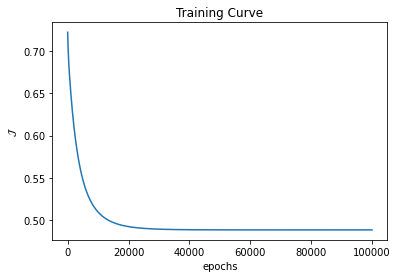

Training Accuracy: 0.7403


In [ ]:
X_train = df.iloc[:614,:2].to_numpy() #goes to 613
y_train = df.iloc[:614,2].to_numpy()
X_validate = df.iloc[614:691,:2].to_numpy()
y_validate = df.iloc[614:691,2].to_numpy()
X_test = df.iloc[691:768,:2].to_numpy()
y_test = df.iloc[691:768,2].to_numpy()

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train, eta = 1e-2, epochs = 1e5,show_curve = True) #    log_reg.fit(X_train, y_train, eta = 1e-2, epochs = 1e5,show_curve = True) 74% 1/max

y_hat = log_reg.predict(X_test)

print(f"Training Accuracy: {accuracy(y_test, y_hat):0.4f}")

In [ ]:
if __name__=="__main__":
  main()